<a href="https://colab.research.google.com/github/Yousufalipangat/Data-Science/blob/main/Case_Study_Zomato_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Exploratory Data Analysis on Zomata Data

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv('zomato_utf.csv')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [169]:
ind_df = df[df['Country Code']==1].copy()

As the analysis is purely based on Indian cities we have created a dataset with indian cities only

In [170]:
ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8652 entries, 624 to 9275
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   Restaurant Name       8652 non-null   object 
 2   Country Code          8652 non-null   int64  
 3   City                  8652 non-null   object 
 4   Address               8652 non-null   object 
 5   Locality              8652 non-null   object 
 6   Locality Verbose      8652 non-null   object 
 7   Longitude             8652 non-null   float64
 8   Latitude              8652 non-null   float64
 9   Cuisines              8652 non-null   object 
 10  Average Cost for two  8652 non-null   int64  
 11  Currency              8652 non-null   object 
 12  Has Table booking     8652 non-null   object 
 13  Has Online delivery   8652 non-null   object 
 14  Is delivering now     8652 non-null   object 
 15  Switch to order men

✅ There seems all columns contains data and no nulls values and datatypes of each columns are perfect

In [171]:
ind_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,8.652000e+03,8652.0,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000
mean,8.657085e+06,1.0,72.856786,26.420652,623.370319,1.721683,2.523324,137.212552
std,8.959437e+06,0.0,18.017536,6.976576,595.676124,0.852544,1.510986,428.039513
min,5.300000e+01,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.007402e+05,1.0,77.098797,28.491425,300.000000,1.000000,2.100000,4.000000
50%,2.200006e+06,1.0,77.203468,28.569869,450.000000,2.000000,3.100000,24.000000
75%,1.836120e+07,1.0,77.285356,28.637857,700.000000,2.000000,3.600000,100.000000
max,1.850065e+07,1.0,91.806493,35.000000,8000.000000,4.000000,4.900000,10934.000000


# 🔰 Let's perform univariate analysis

In [172]:
ind_df['Restaurant ID'].nunique()

8652

In [173]:
for col in ind_df.select_dtypes('O').columns:
  print(col)
  print('-'*len(col))
  print('Total records',ind_df[col].count())
  print('Totol Unique Counts',ind_df[col].nunique())
  print('Unique Values:')
  print(ind_df[col].unique())
  print('*'*100)

Restaurant Name
---------------
Total records 8652
Totol Unique Counts 6604
Unique Values:
['Jahanpanah' 'Rangrezz Restaurant' 'Time2Eat - Mama Chicken' ...
 'Plot 17' 'Vista - The Park' 'Flying Spaghetti Monster']
****************************************************************************************************
City
----
Total records 8652
Totol Unique Counts 43
Unique Values:
['Agra' 'Ahmedabad' 'Allahabad' 'Amritsar' 'Aurangabad' 'Bangalore'
 'Bhopal' 'Bhubaneshwar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Dehradun'
 'Faridabad' 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Indore'
 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Ludhiana' 'Mangalore'
 'Mohali' 'Mumbai' 'Mysore' 'Nagpur' 'Nashik' 'New Delhi' 'Noida'
 'Panchkula' 'Patna' 'Puducherry' 'Pune' 'Ranchi' 'Secunderabad' 'Surat'
 'Vadodara' 'Varanasi' 'Vizag']
****************************************************************************************************
Address
-------
Total records 8652
Totol Unique Counts 8025
Un

In [174]:
ind_df['city_par'] = ind_df['City'].apply( lambda x: 'Delhi NCR' if x in ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'] else 'Rest of India')

🧐 The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the
other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to
Delhi-NCR by creating another columns 'city_par' (partitioning).

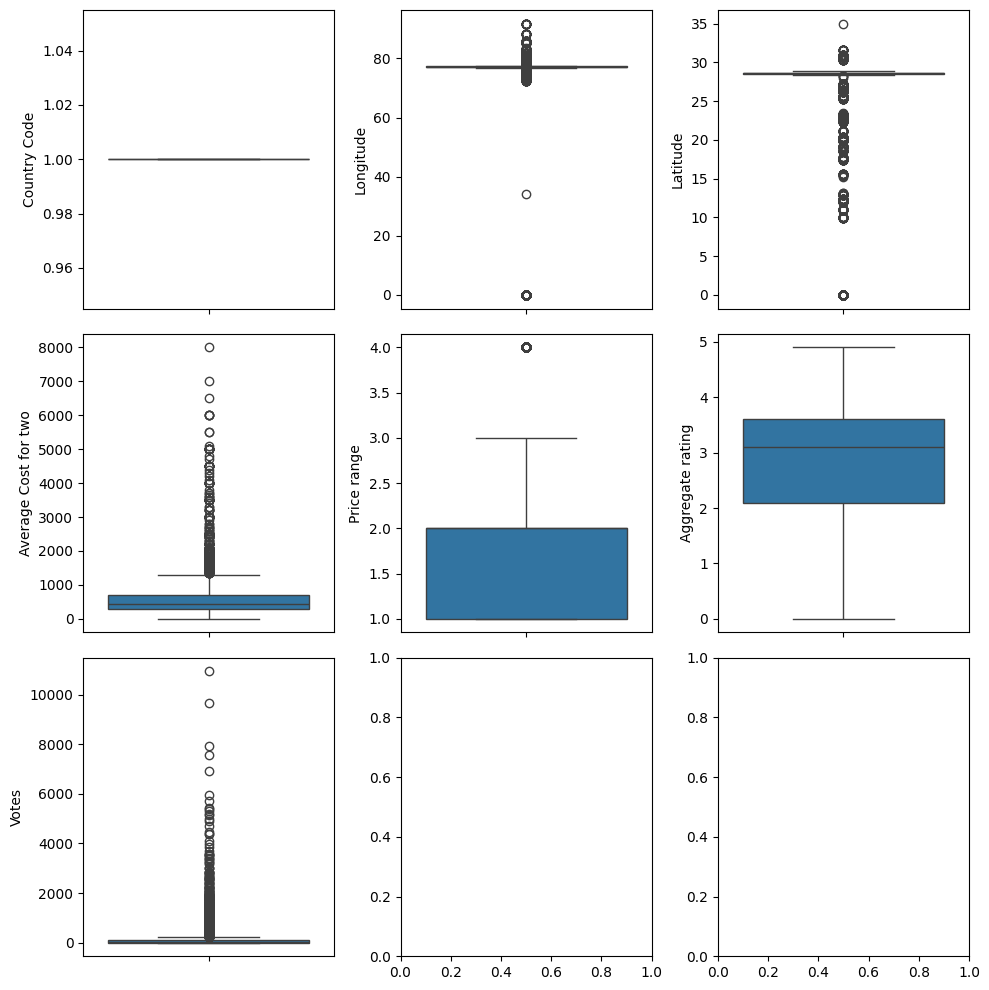

In [175]:
# num_columns = ind_df.select_dtypes('number').columns

num_columns = ['Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

fig , ax = plt.subplots(3,3, figsize=(10,10))
for i,col in enumerate(num_columns):
  sns.boxplot(data=ind_df,y = col , ax = ax[i//3,i%3])
plt.tight_layout()
plt.show()

In [240]:
cln_df = ind_df[(ind_df['Average Cost for two'] < 3000)& (ind_df['Price range'] < 4) & (ind_df['Votes']<3000)]

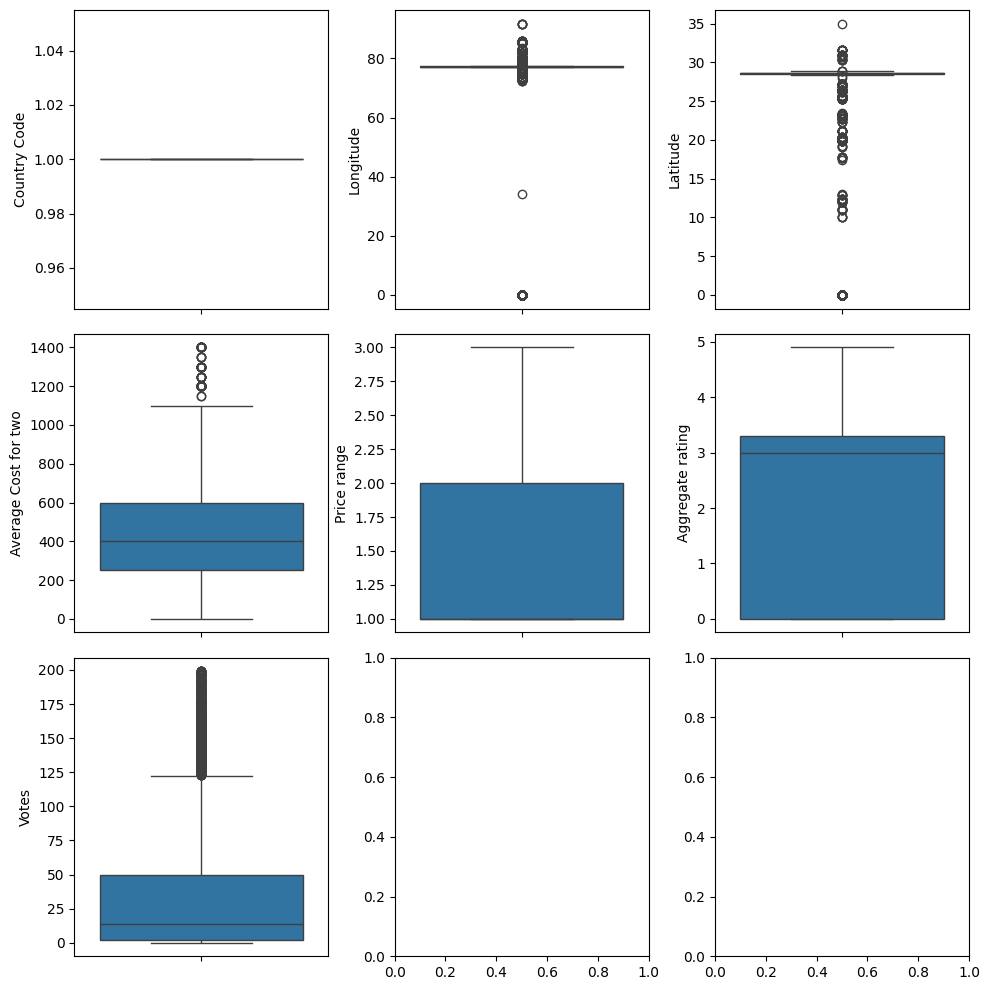

In [236]:
num_columns = ['Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

fig , ax = plt.subplots(3,3, figsize=(10,10))
for i,col in enumerate(num_columns):
  sns.boxplot(data=cln_df,y = col , ax = ax[i//3,i%3])
plt.tight_layout()
plt.show()

In [230]:
copy = ind_df.copy()
# ind_df = copy
ind_df = cln_df

# 🔰 Bivariate Analysis



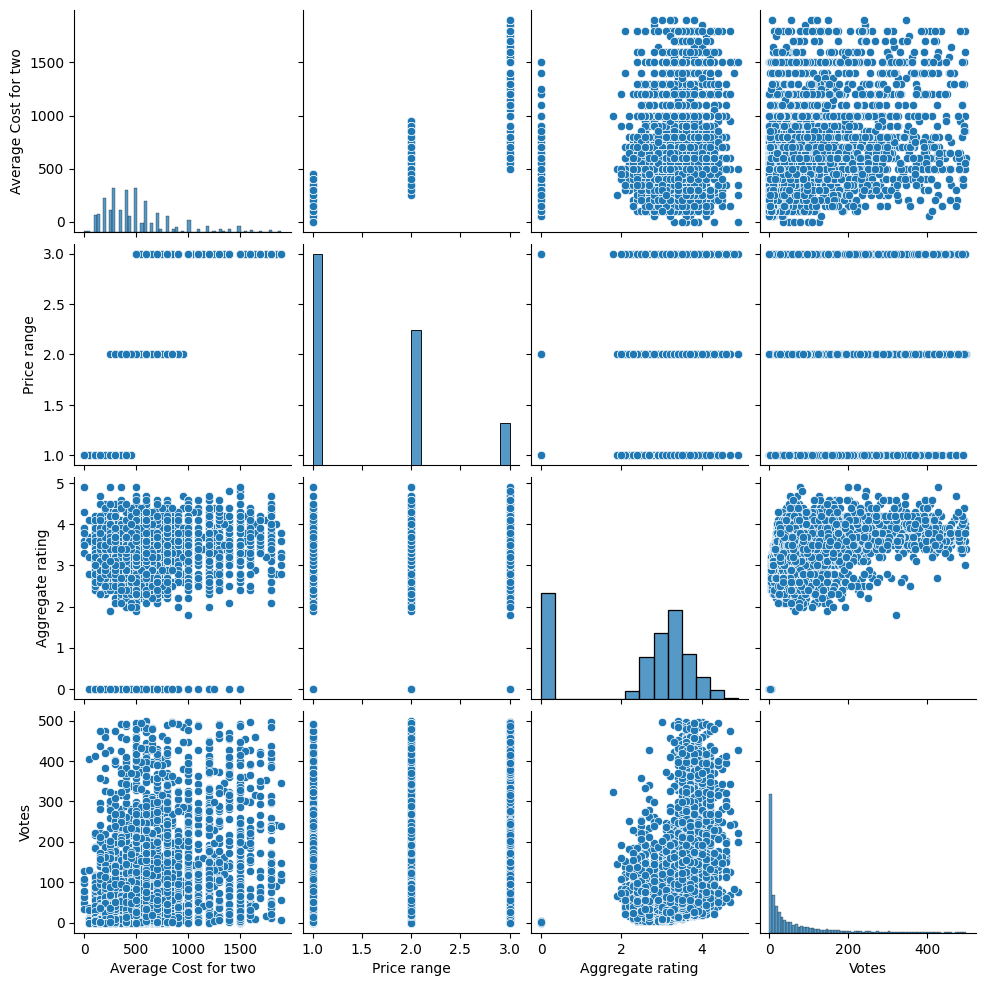

In [239]:
sns.pairplot(data=ind_df , x_vars= ['Average Cost for two','Price range','Aggregate rating','Votes'],y_vars= ['Average Cost for two','Price range','Aggregate rating','Votes'])

# 👨‍🔬 Lets go through the Data and find some interseting insights

📊 Let's understand the number of restaurants present in Delhi NCR vs Rest of India.

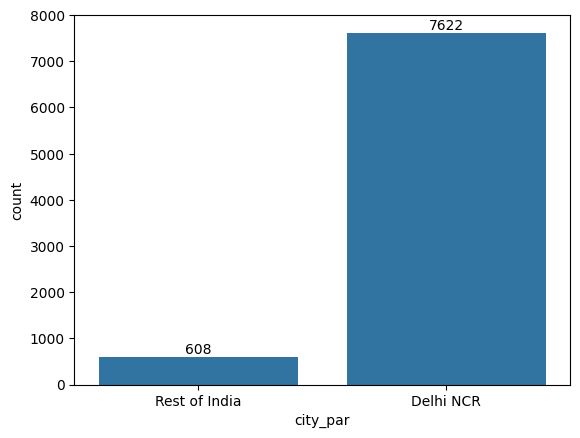

In [179]:
pl = sns.countplot(data=ind_df,x='city_par')
pl.bar_label(pl.containers[0])
plt.show()

🧐 : most of the restaurants registered and working in zomato are in DELHI NCR cities.

🤔 : Do you really think that there are some cuisine not available in Delhi NCR cities? Let's find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.

In [180]:
ind_df['Cuisines']

624                                 North Indian, Mughlai
625                                 North Indian, Mughlai
626                                          North Indian
627                                            Rajasthani
628                        North Indian, Chinese, Mughlai
                              ...                        
9270                                      Biryani, Andhra
9271    Continental, Seafood, Chinese, North Indian, B...
9272                          Cafe, North Indian, Chinese
9273                               Burger, Pizza, Biryani
9275                                              Italian
Name: Cuisines, Length: 8230, dtype: object

In [181]:
cuisines_roi = set()
for i in ind_df[ind_df['city_par']== 'Rest of India']['Cuisines'].unique():
  for k in i.split(', '):
    cuisines_roi.add(k)

cuisines_ncr = set()
for i in ind_df[ind_df['city_par']== 'Delhi NCR']['Cuisines'].unique():
  for k in i.split(', '):
    cuisines_ncr.add(k)


cuisines_roi-cuisines_ncr

{'BBQ', 'Cajun', 'Charcoal Grill', 'German', 'Malwani'}

🧐 : It's interseting to know that above cuisins are not availed in DELHI NCR cities.


.

🤔 : which cousins do you think is more common in Delhi NCR and other cities ? We are going to find next top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of
India.

In [182]:
ind_df['Cuisines'] = ind_df['Cuisines'].apply(lambda x : x.split(", "))

In [183]:

ind_df[['city_par','Cuisines']].explode(column='Cuisines').groupby(['city_par']).value_counts().groupby(level=0,group_keys=False).nlargest(10)

city_par       Cuisines    
Delhi NCR      North Indian    3447
               Chinese         2363
               Fast Food       1860
               Mughlai          905
               Bakery           694
               South Indian     563
               Desserts         539
               Street Food      537
               Cafe             474
               Continental      448
Rest of India  North Indian     279
               Chinese          212
               Continental      139
               Cafe             134
               Italian          128
               Fast Food         94
               South Indian      56
               Desserts          53
               Mughlai           49
               Mexican           45
dtype: int64

💡 North Indian and chinese are most served cuisines whether its Delhi NCR or Rest of India

Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of
India. Plot the suitable graph to explain your inference.

In [222]:
ind_df[ind_df['Aggregate rating'] == ind_df['Aggregate rating'].max()][['Cuisines','city_par','Has Online delivery']].explode('Cuisines').drop_duplicates().sort_values('city_par')

,Cuisines,city_par,Has Online delivery
1381,Mexican,Delhi NCR,Yes
1381,American,Delhi NCR,Yes
1381,Healthy Food,Delhi NCR,Yes
3013,Ice Cream,Delhi NCR,Yes
637,Cafe,Rest of India,No
637,North Indian,Rest of India,No
637,Chinese,Rest of India,No
748,Fast Food,Rest of India,No
822,European,Rest of India,No
822,Mediterranean,Rest of India,No


In top rated restaurants in Delhi NCR, they serve cuisines like Mexican, American, Healthy Food , Ice Creams and all has online delivery options. There is an interesting catch here. Even though chinese cuisines are served more in Delhi NCR and Rest of indian restaurant, chinese cuisine did not listed in top rated restaurant in delhi NCR. So there is a bussiness opportunity here to establish authentic chinese cuisines in top rated restaurants. Also in rest of indian restaurant online delivery options is not there for chinese cuisines.

🤔 : why do people choose online delivery instead of booking table in restaurant? May be we will figure it out in next analysis

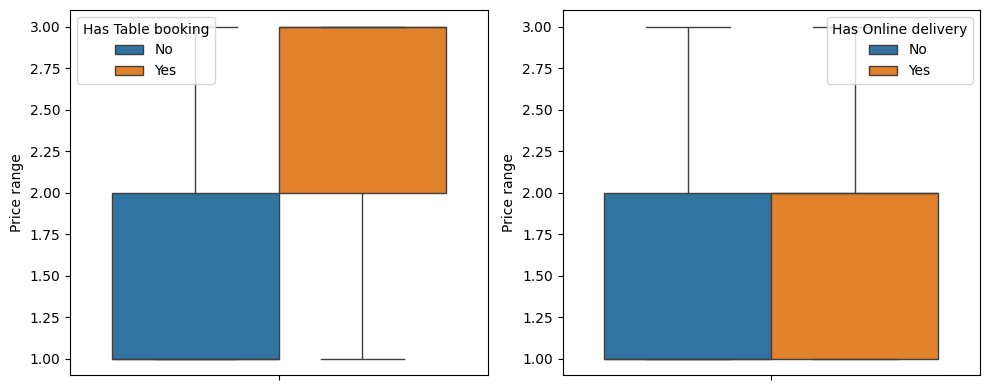

In [133]:
fig, ax = plt.subplots(1,2,figsize = (10,4))
sns.boxplot(data=ind_df, y = 'Price range', hue = 'Has Table booking', ax = ax[0])
sns.boxplot(data=ind_df, y = 'Price range', hue = 'Has Online delivery', ax = ax[1])
plt.tight_layout()
plt.show()

#  Has Table booking     8652 non-null   object
#  13  Has Online delivery

🧐 : Yes , the price range might be the reason people prefer online delivery. If we look at the above graph we could find that the price range of table booking available restaurant is high, however the online delivered are in low price range.